#Iris Classification

## Import the relevant libraries

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

## Data Preprocessing

### 1) Load the data

In [45]:
iris_data = pd.read_csv('/content/iris.csv')
iris_data.head()
np_iris = iris_data.to_numpy()

In [46]:
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
iris_data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Label encoding the categorical data

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Split into features and targets

In [52]:
x_data = iris_data.iloc[: , :-1]
y_data = iris_data.iloc[: , -1]
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

### One hot encoding targets

In [53]:
y_data = tf.keras.utils.to_categorical(y_data,3)
y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Splitting into train and test set

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x_data, y_data, test_size=0.10)

## Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
x_train

array([[-4.11938161e-01, -1.53203545e+00,  4.42161684e-02,
        -1.33266731e-01],
       [-5.36908165e-01, -1.71346070e-01,  4.45988084e-01,
         3.88211780e-01],
       [ 8.37761878e-01, -1.71346070e-01,  8.47759999e-01,
         1.04005992e+00],
       [-2.86968157e-01, -1.71346070e-01,  2.16404132e-01,
         1.27472525e-01],
       [ 2.12911859e-01, -1.98559858e+00,  1.59008144e-01,
        -2.63636358e-01],
       [-1.16175818e+00,  1.18934331e+00, -1.33328754e+00,
        -1.43696301e+00],
       [-7.86848173e-01, -8.51690761e-01,  1.01612156e-01,
         2.57842153e-01],
       [-1.61998153e-01, -3.98127634e-01,  2.73800120e-01,
         1.27472525e-01],
       [-1.66163820e+00, -1.75881702e+00, -1.39068353e+00,
        -1.17622375e+00],
       [ 2.33740193e+00, -1.71346070e-01,  1.36432389e+00,
         1.43116880e+00],
       [-9.11818177e-01,  1.64290644e+00, -1.04630760e+00,
        -1.04585412e+00],
       [-1.03678818e+00,  9.62561748e-01, -1.21849556e+00,
      

In [57]:
x_test

array([[ 0.58782187, -1.75881702,  0.3885921 ,  0.12747252],
       [-1.28672819,  0.05543549, -1.21849556, -1.30659338],
       [-1.5366682 ,  1.18934331, -1.56287149, -1.30659338],
       [-0.41193816, -1.53203545, -0.01317982, -0.26363636],
       [ 1.71255191,  0.28221706,  1.3069279 ,  0.77932066],
       [ 1.33764189,  0.05543549,  0.67557204,  0.38821178],
       [ 1.83752191, -0.39812763,  1.47911587,  0.77932066],
       [-1.41169819,  0.28221706, -1.21849556, -1.30659338],
       [ 0.71279187, -0.6249092 ,  1.07734395,  1.17042955],
       [ 0.33788186, -1.07847232,  1.07734395,  0.25784215],
       [-1.91157821, -0.17134607, -1.5054755 , -1.43696301],
       [-0.16199815, -0.17134607,  0.27380012, -0.0028971 ],
       [-0.03702815, -0.85169076,  0.10161216, -0.0028971 ],
       [ 0.46285187, -0.39812763,  0.33119611,  0.12747252],
       [ 2.33740193, -1.07847232,  1.82349179,  1.4311688 ]])

In [33]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(135, 4) (135,) (15, 4) (15,)


### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

classes = 3

model = keras.Sequential([
        layers.Dense(128 , input_shape = (4,) , name='Hidden_layer1' , activation = 'relu') ,
        layers.Dense(128,name='Hidden-Layer-2' , activation='relu'),
        layers.Dense(classes , name='Output-Layer' , activation='softmax')
        
])

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Training and evaluation

Epoch 1/10
7/7 [==============================] - 1s 35ms/step - loss: 0.8105 - accuracy: 0.7222 - val_loss: 0.6059 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.5391 - accuracy: 0.8241 - val_loss: 0.4658 - val_accuracy: 0.7778
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4297 - accuracy: 0.8426 - val_loss: 0.3934 - val_accuracy: 0.7778
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3714 - accuracy: 0.8426 - val_loss: 0.3413 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3346 - accuracy: 0.8426 - val_loss: 0.3061 - val_accuracy: 0.8148
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3031 - accuracy: 0.8796 - val_loss: 0.2999 - val_accuracy: 0.7778
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2789 - accuracy: 0.8796 - val_loss: 0.2664 - val_accuracy: 0.8148
Epoch 8/10
7/7 [=================

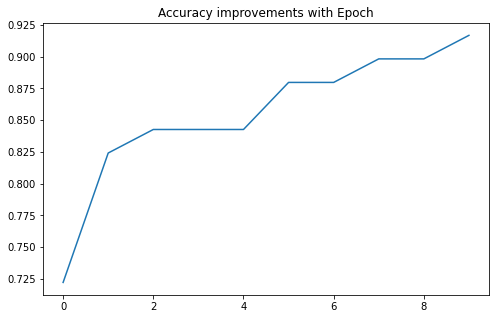


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 19ms/step - loss: 0.2178 - accuracy: 0.8667


[0.2177976667881012, 0.8666666746139526]

In [59]:
history = model.fit (x_train , y_train , batch_size = 16 ,epochs = 10 ,  validation_split = 0.2)

print("\nAccuracy during Training :\n------------------------------------")
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)

## Prediction with model

In [60]:
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Raw Prediction Output (Probabilities) : [[0.0182822  0.5569503  0.42476752]]
Prediction is  ['versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
